In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### ASSESSING DATA

In [22]:
#reading in data
data = pd.read_csv('C:/Users/NET PC/Desktop/MACHINE LEARNING CLASS 1/Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [23]:
#checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [24]:
#statistical distribution of num_feat
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [25]:
#statistical distribution of cat_feat
data.describe(exclude=['int64','float64'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [26]:
#checking for missing features
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [27]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

### EDA

### Univariate Analysis

In [1]:
#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

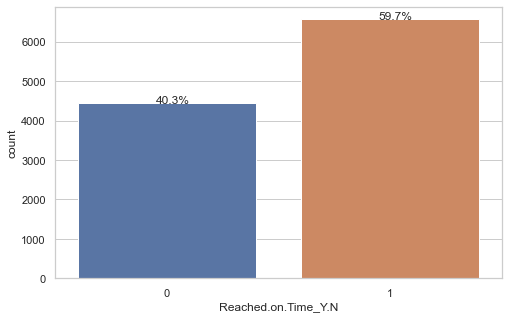

In [29]:
#target(dependant variable)
#fix data type
data['Reached.on.Time_Y.N'] = data['Reached.on.Time_Y.N'].astype(dtype='category')

#distribution of target feature
sb.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sb.countplot(x='Reached.on.Time_Y.N',data=data);
perc_plot(ax,data['Reached.on.Time_Y.N'])

### Data Processing

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10999 non-null  int64   
 1   Warehouse_block      10999 non-null  object  
 2   Mode_of_Shipment     10999 non-null  object  
 3   Customer_care_calls  10999 non-null  int64   
 4   Customer_rating      10999 non-null  int64   
 5   Cost_of_the_Product  10999 non-null  int64   
 6   Prior_purchases      10999 non-null  int64   
 7   Product_importance   10999 non-null  object  
 8   Gender               10999 non-null  object  
 9   Discount_offered     10999 non-null  int64   
 10  Weight_in_gms        10999 non-null  int64   
 11  Reached.on.Time_Y.N  10999 non-null  category
dtypes: category(1), int64(7), object(4)
memory usage: 956.2+ KB


In [31]:
#segment our data into x dataset and target variable
x=data.drop('Reached.on.Time_Y.N',axis=1)
target = data['Reached.on.Time_Y.N']

In [32]:
#Encoding categorical features into numerical ones using one hot encoding(get_dummies)
data2=pd.get_dummies(x,columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],drop_first=True)
data2.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,4,2,177,3,44,1233,0,0,1,0,0,0,1,0,0
1,2,4,5,216,2,59,3088,0,0,0,1,0,0,1,0,1
2,3,2,2,183,4,48,3374,0,0,0,0,0,0,1,0,1
3,4,3,3,176,4,10,1177,1,0,0,0,0,0,0,1,1
4,5,2,2,184,3,46,2484,0,1,0,0,0,0,0,1,0


In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Warehouse_block_B          10999 non-null  uint8
 8   Warehouse_block_C          10999 non-null  uint8
 9   Warehouse_block_D          10999 non-null  uint8
 10  Warehouse_block_F          10999 non-null  uint8
 11  Mode_of_Shipment_Road      10999 non-null  uint8
 12  Mode_of_Shipment_Ship      10999 non-null  uint8
 13  Product_importance_low     10999 non-null  uint8
 14  Product_importance_med

In [34]:
#scaling dataset
from sklearn.preprocessing import MinMaxScaler

#instantiate our scaler
scaler=MinMaxScaler()

scaled_data=scaler.fit_transform(data2)
#scaled_data

In [35]:
#split datset into training and validation set
from sklearn.model_selection import train_test_split

#split dataset into training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data,target, test_size=0.33, random_state=42)


In [36]:
x_train.shape

(7369, 16)

In [37]:
x_test.shape

(3630, 16)

In [39]:
### building a base model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
#instantiating our classifier models
lr_mod=LogisticRegression()
gb_mod=GaussianNB()
rf_mod=RandomForestClassifier()
dt_mod=DecisionTreeClassifier()

#fitting and training our classifier models
lr_mod.fit(x_train,y_train)
gb_mod.fit(x_train,y_train)
rf_mod.fit(x_train,y_train)
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
#creating a prediction
pred_lr=lr_mod.predict(x_test)
pred_gb=gb_mod.predict(x_test)
pred_rf=rf_mod.predict(x_test)
pred_dt=dt_mod.predict(x_test)

 ### model evaluation

In [48]:
lr_score=lr_mod.score(x_test,y_test)
gb_score=gb_mod.score(x_test,y_test)
rf_score=rf_mod.score(x_test,y_test)
dt_score=dt_mod.score(x_test,y_test)

print(f"model accuracy score for Logistic Regression is: {lr_score}")
print(f"model accuracy score for Naive_bayes is {gb_score}:")
print(f"model accuracy score for RandomForestClassifier is: {rf_score}")
print(f"model accuracy score for DecisionTreeClassifier is: {dt_score}")

model accuracy score for Logistic Regression is: 0.6550964187327823
model accuracy score for Naive_bayes is 0.6845730027548209:
model accuracy score for RandomForestClassifier is: 0.6674931129476585
model accuracy score for DecisionTreeClassifier is: 0.6393939393939394
